In [1]:
import tensorflow as tf

mnist=tf.keras.datasets.mnist

In [2]:
mnist

<module 'tensorflow_core.keras.datasets.mnist' from 'C:\\Users\\Amani\\Anaconda3\\lib\\site-packages\\tensorflow_core\\python\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [10]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()
x_train=tf.keras.utils.normalize(x_train, axis=1)
x_test=tf.keras.utils.normalize(x_test, axis=1)

model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 6s 104us/sample - loss: 0.2574 - accuracy: 0.9239
Epoch 2/3
60000/60000 [==============================] - 6s 95us/sample - loss: 0.1061 - accuracy: 0.9667
Epoch 3/3
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0720 - accuracy: 0.9772


In [13]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.09261722383080051 0.9717


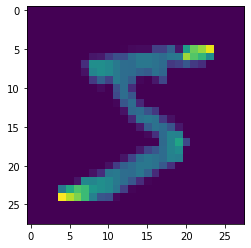

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [14]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
plt.show()

print(x_train[0])

In [15]:
model.save('epic_num_reader.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [16]:
new_model=tf.keras.models.load_model('epic_num_reader.model')

In [17]:
predictions=new_model.predict([x_test])

In [18]:
print(predictions)

[[2.0074657e-09 2.0620271e-07 2.0117533e-07 ... 9.9999738e-01
  3.1082039e-09 2.2095988e-07]
 [9.6011332e-09 3.4284347e-03 9.9651474e-01 ... 1.2487695e-09
  1.1949835e-05 2.1385943e-10]
 [7.4079487e-08 9.9997509e-01 4.2190068e-06 ... 3.1769835e-06
  1.1237751e-05 2.0418637e-08]
 ...
 [2.6467146e-07 1.2321044e-04 4.8716774e-06 ... 5.3922919e-04
  4.8851442e-05 3.1104434e-04]
 [4.1177186e-06 6.2645870e-07 1.2593311e-07 ... 2.8050906e-08
  4.2618718e-04 3.7945348e-08]
 [1.6100807e-05 1.5672530e-06 1.3537961e-06 ... 4.5493325e-09
  7.6549975e-07 3.5113992e-08]]


In [29]:
import numpy as np

print(np.argmax(predictions[6]))

4


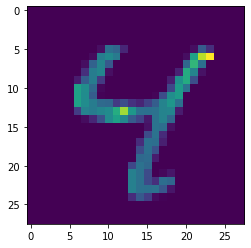

In [30]:
plt.imshow(x_test[6])
plt.show()